In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df_v1 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines = True)
df_v2 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [ ]:
#As both the datasets look same, let's combine them into 1.
df = pd.concat([df_v1, df_v2], axis=0)

In [ ]:
# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['headline']).toarray()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['is_sarcastic'], test_size=0.2, random_state=42)


In [ ]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)


In [ ]:
# Build an LSTM Model
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['headline'])
X_lstm = tokenizer.texts_to_sequences(df['headline'])
X_lstm = pad_sequences(X_lstm, maxlen=50)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the LSTM Model
X_lstm_train, X_lstm_test, y_train, y_test = train_test_split(X_lstm, df['is_sarcastic'], test_size=0.2, random_state=42)
lstm_model.fit(X_lstm_train, y_train, epochs=5, batch_size=64)


In [ ]:
# Ensemble the Models
rf_predictions = rf_classifier.predict(X_test)
lstm_predictions = lstm_model.predict(X_lstm_test)
ensemble_predictions = (rf_predictions + lstm_predictions.reshape(-1)) / 2
ensemble_predictions = np.round(ensemble_predictions)


In [ ]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)

# You can also print a classification report to see precision, recall, and F1-score.
report = classification_report(y_test, ensemble_predictions)
print(report)


In [ ]:
# You can also print a classification report to see precision, recall, and F1-score.
report = classification_report(y_test, ensemble_predictions)
print(report)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcasm', 'Sarcasm'], yticklabels=['Not Sarcasm', 'Sarcasm'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install nlpaug

In [ ]:
import nltk

nltk.download('wordnet')


**CNN + LSTM**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load the dataset
df_v1 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines=True)
df_v2 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json', lines=True)


In [ ]:
# Combine the datasets
df = pd.concat([df_v1, df_v2], axis=0)


In [ ]:
# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['headline']).toarray()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['is_sarcastic'], test_size=0.2, random_state=42)


In [ ]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)


In [ ]:
# Build a CNN-LSTM Hybrid Model
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['headline'])
X_cnn_lstm = tokenizer.texts_to_sequences(df['headline'])
X_cnn_lstm = pad_sequences(X_cnn_lstm, maxlen=50)

cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
cnn_lstm_model.add(Conv1D(64, 5, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=4))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the CNN-LSTM Model
X_cnn_lstm_train, X_cnn_lstm_test, y_train, y_test = train_test_split(X_cnn_lstm, df['is_sarcastic'], test_size=0.2, random_state=42)
cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=5, batch_size=64)


In [ ]:
# Ensemble the Models
rf_predictions = rf_classifier.predict(X_test)
cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
ensemble_predictions = (rf_predictions + cnn_lstm_predictions.reshape(-1)) / 2
ensemble_predictions = np.round(ensemble_predictions)


In [ ]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)


In [ ]:
# Print a classification report to see precision, recall, and F1-score.
report = classification_report(y_test, ensemble_predictions)
print(report)


**CNN+LSTM+RF**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Load the dataset
df_v1 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines=True)
df_v2 = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json', lines=True)


In [4]:
# Combine the datasets
df = pd.concat([df_v1, df_v2], axis=0)


In [5]:
# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['headline']).toarray()


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['is_sarcastic'], test_size=0.2, random_state=42)


In [7]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Increased the number of estimators
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Build a CNN-LSTM Hybrid Model
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['headline'])
X_cnn_lstm = tokenizer.texts_to_sequences(df['headline'])
X_cnn_lstm = pad_sequences(X_cnn_lstm, maxlen=50)


cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
cnn_lstm_model.add(Conv1D(128, 5, activation='relu'))  # Increased the number of filters
cnn_lstm_model.add(MaxPooling1D(pool_size=4))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
# Train the CNN-LSTM Model
X_cnn_lstm_train, X_cnn_lstm_test, y_train, y_test = train_test_split(X_cnn_lstm, df['is_sarcastic'], test_size=0.2, random_state=42)
cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=10, batch_size=64)  # Increased the number of epochs


Epoch 1/10
692/692 [==============================] - 28s 36ms/step - loss: 0.3692 - accuracy: 0.8266
Epoch 2/10
692/692 [==============================] - 25s 36ms/step - loss: 0.1892 - accuracy: 0.9228
Epoch 3/10
692/692 [==============================] - 25s 37ms/step - loss: 0.0829 - accuracy: 0.9648
Epoch 4/10
692/692 [==============================] - 25s 37ms/step - loss: 0.0465 - accuracy: 0.9770
Epoch 5/10
692/692 [==============================] - 26s 38ms/step - loss: 0.0380 - accuracy: 0.9800
Epoch 6/10
692/692 [==============================] - 26s 38ms/step - loss: 0.0350 - accuracy: 0.9814
Epoch 7/10
692/692 [==============================] - 25s 37ms/step - loss: 0.0308 - accuracy: 0.9822
Epoch 8/10
692/692 [==============================] - 26s 37ms/step - loss: 0.0291 - accuracy: 0.9829
Epoch 9/10
692/692 [==============================] - 26s 37ms/step - loss: 0.0297 - accuracy: 0.9827
Epoch 10/10
692/692 [==============================] - 25s 37ms/step - loss: 0.031

In [10]:
# Ensemble the Models
rf_predictions = rf_classifier.predict(X_test)
cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
ensemble_predictions = (rf_predictions + cnn_lstm_predictions.reshape(-1)) / 2
ensemble_predictions = np.round(ensemble_predictions)


346/346 [==============================] - 3s 7ms/step


In [11]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9541839869871679


In [12]:
# Print a classification report to see precision, recall, and F1-score.
report = classification_report(y_test, ensemble_predictions)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5878
           1       0.96      0.95      0.95      5188

    accuracy                           0.95     11066
   macro avg       0.95      0.95      0.95     11066
weighted avg       0.95      0.95      0.95     11066



**Step Decay Learning Rate Schedule Optimization**

In [13]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math


In [14]:
# Learning Rate Schedule
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr


In [15]:
# Build a CNN-LSTM Hybrid Model with Learning Rate Schedule
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
cnn_lstm_model.add(Conv1D(64, 5, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=4))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))


In [16]:
# Use Adam optimizer with the learning rate schedule
opt = Adam(learning_rate=0.0)
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [17]:
# Create a Learning Rate Scheduler callback
lr_schedule = LearningRateScheduler(step_decay)


In [18]:
# Train the CNN-LSTM Model with Learning Rate Schedule
X_cnn_lstm_train, X_cnn_lstm_test, y_train, y_test = train_test_split(X_cnn_lstm, df['is_sarcastic'], test_size=0.2, random_state=42)
cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=30, batch_size=64, callbacks=[lr_schedule])


Epoch 1/30
692/692 [==============================] - 22s 28ms/step - loss: 0.3741 - accuracy: 0.8232 - lr: 0.0010
Epoch 2/30
692/692 [==============================] - 19s 28ms/step - loss: 0.1977 - accuracy: 0.9190 - lr: 0.0010
Epoch 3/30
692/692 [==============================] - 20s 28ms/step - loss: 0.0907 - accuracy: 0.9621 - lr: 0.0010
Epoch 4/30
692/692 [==============================] - 19s 28ms/step - loss: 0.0490 - accuracy: 0.9761 - lr: 0.0010
Epoch 5/30
692/692 [==============================] - 20s 29ms/step - loss: 0.0308 - accuracy: 0.9831 - lr: 5.0000e-04
Epoch 6/30
692/692 [==============================] - 19s 28ms/step - loss: 0.0265 - accuracy: 0.9842 - lr: 5.0000e-04
Epoch 7/30
692/692 [==============================] - 19s 28ms/step - loss: 0.0254 - accuracy: 0.9846 - lr: 5.0000e-04
Epoch 8/30
692/692 [==============================] - 20s 28ms/step - loss: 0.0249 - accuracy: 0.9845 - lr: 5.0000e-04
Epoch 9/30
692/692 [==============================] - 19s 28ms/s

In [19]:
# Evaluate the Model
cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
cnn_lstm_predictions = np.round(cnn_lstm_predictions)

346/346 [==============================] - 3s 6ms/step


In [20]:
# Evaluate the Random Forest Model
rf_test_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forest Model Testing Accuracy:", rf_accuracy)


Random Forest Model Testing Accuracy: 0.9541839869871679


In [21]:
# Evaluate the CNN-LSTM Model
cnn_lstm_test_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
cnn_lstm_test_predictions = np.round(cnn_lstm_test_predictions)
cnn_lstm_accuracy = accuracy_score(y_test, cnn_lstm_test_predictions)
print("CNN-LSTM Model Testing Accuracy:", cnn_lstm_accuracy)


346/346 [==============================] - 2s 6ms/step
CNN-LSTM Model Testing Accuracy: 0.9502078438460149


In [22]:
# Evaluate the Ensemble Model
ensemble_test_predictions = (rf_test_predictions + cnn_lstm_test_predictions.reshape(-1)) / 2
ensemble_test_predictions = np.round(ensemble_test_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_test_predictions)
print("Ensemble Model Testing Accuracy:", ensemble_accuracy)


Ensemble Model Testing Accuracy: 0.9530092174227363


**Ensemble model visualizations**

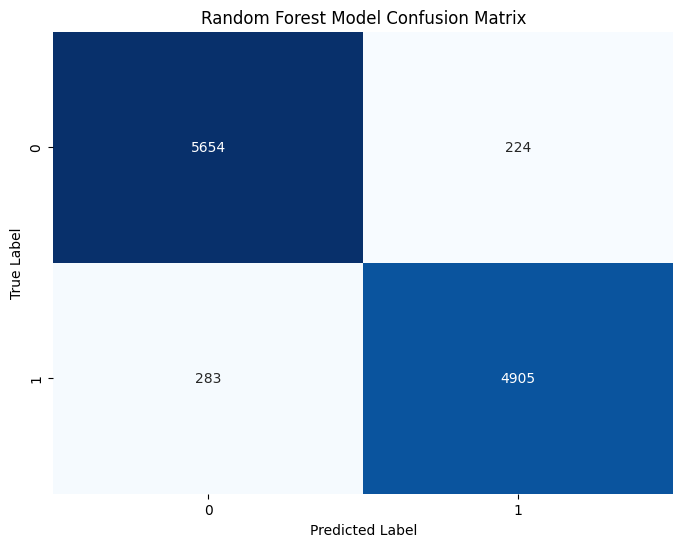

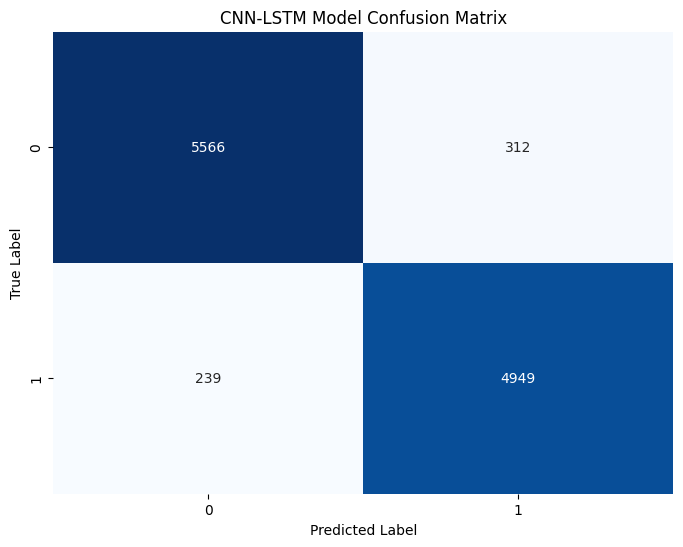

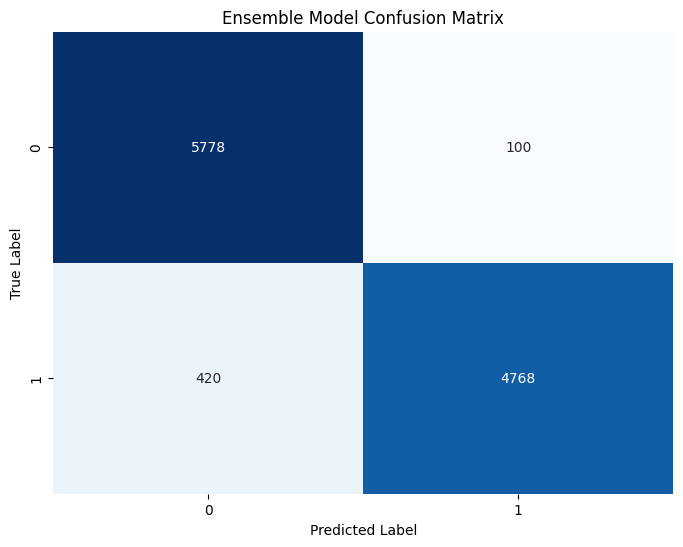

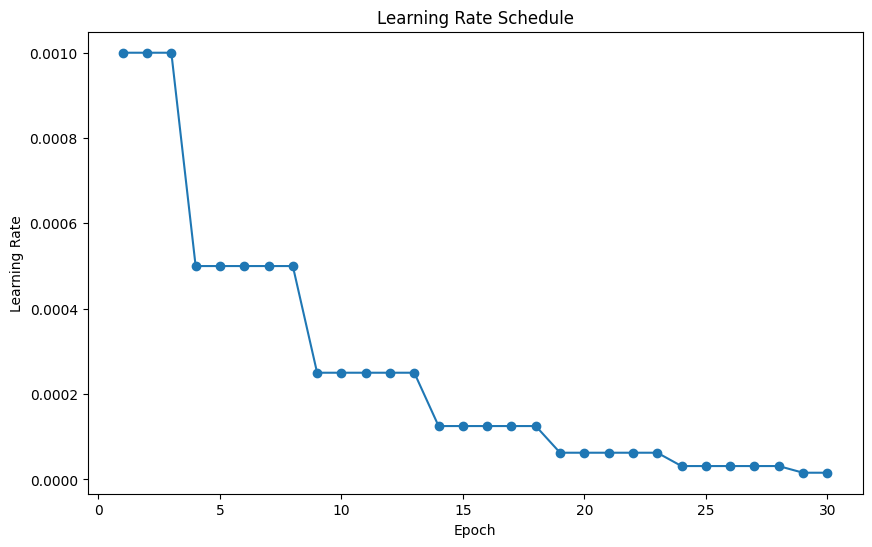

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize Confusion Matrix for Random Forest Model
rf_cm = confusion_matrix(y_test, rf_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Confusion Matrix for CNN-LSTM Model
cnn_lstm_cm = confusion_matrix(y_test, cnn_lstm_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_lstm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('CNN-LSTM Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Confusion Matrix for Ensemble Model
ensemble_cm = confusion_matrix(y_test, ensemble_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize Learning Rate Schedule
epochs = range(1, 31)
learning_rates = [step_decay(epoch) for epoch in epochs]

plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, marker='o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


In [24]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, accuracy, and F1-score for the Ensemble Model
ensemble_precision = precision_score(y_test, ensemble_test_predictions)
ensemble_recall = recall_score(y_test, ensemble_test_predictions)
ensemble_f1 = f1_score(y_test, ensemble_test_predictions)

# Print metrics for the Ensemble Model
print("Ensemble Model Testing Precision:", ensemble_precision)
print("Ensemble Model Testing Recall:", ensemble_recall)
print("Ensemble Model Testing F1 Score:", ensemble_f1)



Ensemble Model Testing Precision: 0.9794576828266228
Ensemble Model Testing Recall: 0.9190439475713185
Ensemble Model Testing F1 Score: 0.9482895783611773


In [25]:
# Experiment 1: Test with Different Batch Sizes
def test_batch_size(batch_size):
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
    cnn_lstm_model.add(Conv1D(64, 5, activation='relu'))
    cnn_lstm_model.add(MaxPooling1D(pool_size=4))
    cnn_lstm_model.add(LSTM(64))
    cnn_lstm_model.add(Dense(1, activation='sigmoid'))
    cnn_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    X_cnn_lstm_train, X_cnn_lstm_test, y_train, y_test = train_test_split(X_cnn_lstm, df['is_sarcastic'], test_size=0.2, random_state=42)
    
    # Train the CNN-LSTM Model with different batch sizes
    cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=10, batch_size=batch_size)

    # Evaluate the Model
    cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
    cnn_lstm_predictions = np.round(cnn_lstm_predictions)

    accuracy = accuracy_score(y_test, cnn_lstm_predictions)
    print(f"\nCNN-LSTM Model with Batch Size {batch_size} - Accuracy: {accuracy}")

# Test with different batch sizes (e.g., 32, 64, 128)
test_batch_size(32)
test_batch_size(64)
test_batch_size(128)

# Experiment 2: Test with Noisy Data
def test_noisy_data(noise_factor):
    X_cnn_lstm_noisy = X_cnn_lstm + noise_factor * np.random.normal(size=X_cnn_lstm.shape)
    
    cnn_lstm_model = Sequential()
    cnn_lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
    cnn_lstm_model.add(Conv1D(64, 5, activation='relu'))
    cnn_lstm_model.add(MaxPooling1D(pool_size=4))
    cnn_lstm_model.add(LSTM(64))
    cnn_lstm_model.add(Dense(1, activation='sigmoid'))
    cnn_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    X_cnn_lstm_train, X_cnn_lstm_test, y_train, y_test = train_test_split(X_cnn_lstm_noisy, df['is_sarcastic'], test_size=0.2, random_state=42)
    
    # Train the CNN-LSTM Model with noisy data
    cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=10, batch_size=64)

    # Evaluate the Model
    cnn_lstm_predictions = cnn_lstm_model.predict(X_cnn_lstm_test)
    cnn_lstm_predictions = np.round(cnn_lstm_predictions)

    accuracy = accuracy_score(y_test, cnn_lstm_predictions)
    print(f"\nCNN-LSTM Model with Noise Factor {noise_factor} - Accuracy: {accuracy}")

# Test with different noise factors (e.g., 0.1, 0.2, 0.3)
test_noisy_data(0.1)
test_noisy_data(0.2)
test_noisy_data(0.3)



Epoch 1/10
1384/1384 [==============================] - 32s 21ms/step - loss: 0.3594 - accuracy: 0.8309
Epoch 2/10
1384/1384 [==============================] - 30s 21ms/step - loss: 0.1742 - accuracy: 0.9286
Epoch 3/10
1384/1384 [==============================] - 30s 21ms/step - loss: 0.0758 - accuracy: 0.9665
Epoch 4/10
1384/1384 [==============================] - 29s 21ms/step - loss: 0.0437 - accuracy: 0.9782
Epoch 5/10
1384/1384 [==============================] - 29s 21ms/step - loss: 0.0368 - accuracy: 0.9807
Epoch 6/10
1384/1384 [==============================] - 29s 21ms/step - loss: 0.0337 - accuracy: 0.9815
Epoch 7/10
1384/1384 [==============================] - 29s 21ms/step - loss: 0.0319 - accuracy: 0.9828
Epoch 8/10
1384/1384 [==============================] - 29s 21ms/step - loss: 0.0303 - accuracy: 0.9829
Epoch 9/10
1384/1384 [==============================] - 30s 22ms/step - loss: 0.0285 - accuracy: 0.9832
Epoch 10/10
346/346 [==============================] - 3s 6ms/st

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_7/embedding_7/embedding_lookup' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_33/657746264.py", line 55, in <module>
      test_noisy_data(0.3)
    File "/tmp/ipykernel_33/657746264.py", line 43, in test_noisy_data
      cnn_lstm_model.fit(X_cnn_lstm_train, y_train, epochs=10, batch_size=64)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/core/embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_7/embedding_7/embedding_lookup'
indices[44,21] = -1 is not in [0, 5000)
	 [[{{node sequential_7/embedding_7/embedding_lookup}}]] [Op:__inference_train_function_319836]